# Project 1 - COVID-19 Data Analysis

**Project deadline:** This project is due for submission on Monday, 25.05.2020. You receive details on the submission process from your tutor!

**PLEASE READ THIS NOTEBOOK COMPLETELY BEFORE YOU START TO WORK ON THE PROJECT!**

## About the Projects
- You will get one project approximately every other week.
- Besides the homework-assignmentts, you need to solve the projects in order to pass the course. Your final course mark consists of the mean of your project marks. We aim to hand-out six projects during the term and we do not consider the worst project mark for your final course mark. Projects that you do not hand in are counted with a mark of 4.
- The projects need to be submitted to your tutor and he will give you necessary information on the submission process!
- **In contrast to the homework exercises, each student must hand in an own solution for the projects! Of course you can and should discuss problems with each other! However, you must not use code or code-parts from your student peers in your project solutions!**

**Note: The tutors, Oliver and I are very happy to help you out with difficulties you might have with the project tasks! You can ask questions any time but please do so well in advance of the deadlines!**

## Analysis of public COVID-19 data

In this first project, we would like to demonstrate that you can do advanced data analysis already with your current knowledge and with just a few lines of `Python`-code. Nevertheless the notebook contains some more advanced technical aspects to load data from the WWW and to prepare them for further analysis. Please do not worry if you do not fully understand all details of that part right now. We will cover those aspects later in the term.

We will do this project with a topic concerning all of us the moment, the COVID-19 pandemy. We will download publicly available data with a daily listing of new (known!) COVID-19 cases and new deaths due to the pandemy. The data set contains information on *all* countries with known COVID-19 cases. Your task will be to analyse the development of the pandemy and to check which countries currently do have a raising number of infectious COVID-19 patients.

The data that we will use in this notebook are daily updated and published by the [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

In [1]:
# We need some modules (Python libraries) in the following.
# Usually, such modules are loaded in the first cell of a notebook.
# The modules that we need concern loading the data and plotting
# them later.

# all plots should appear directly within the notebook
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

# seaborn just makes plots look a bit nicer - not
# absolutely necessary though.
import seaborn as sns
sns.set_style("whitegrid")

# modules to load the data. The Pandas module
# is just needed for a quick data-loading demonstration at the
# start of the Notebook. The corona_data module is self-made
# to comfortably load and administrate the COVID-19 data.
# To work correctly, a file named 'corona_data.py' must be
# in the same directory as this notebook file!
import pandas as pd
import corona_data

# module to make avilable data structures and routines
# for numerics
import numpy as np

## Loading data

### Data-loading demo with standard Python-modules

One great feature of `Python` is the ability to load all kinds of standardised data-formats into memory - in most cases with a single command. The data can be located on your disk or on the Web. In the following, we directly load data from [this Web-address](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv) (no need to separately download them).

In [2]:
# load COVID-19 data from the WEB with the pandas-modult
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/',
                   engine="python")

# Uncomment the following line if you want to see all lines
# (more than 15000) and not only 10:
#pd.set_option('display.max_rows', None)
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,08/05/2020,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
1,07/05/2020,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia
2,06/05/2020,6,5,2020,330,5,Afghanistan,AF,AFG,37172386.0,Asia
3,05/05/2020,5,5,2020,190,5,Afghanistan,AF,AFG,37172386.0,Asia
4,04/05/2020,4,5,2020,235,13,Afghanistan,AF,AFG,37172386.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
15693,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15694,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0,Africa
15695,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0,Africa
15696,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0,Africa


The data lists among other quantities:
- first column (dateRep): (reported) date
- fifth column (cases): new confirmed COVID-19 cases at that date
- sixth column (deaths): new deaths because of COVID-19 at that date
- seventh column (countriesAndTerritories): country

The file lists all data from the 31st of December 2019 up to-date for all countries with known COVID-19 cases. Which countries are listed? Such information can be retrieved easily and quickly.

In [3]:
# list all countries reported in the data:
#
# The following line ensures that each country is reported once and that
# the resulting list is sorted:
countries = sorted((set(data['countriesAndTerritories'])))

# we only print 5 countries as the list is very long. Just remove the brackets
# if you want the full list:
countries[0:5]

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

### Data-loading for our project

Although the above data-format can be used efficiently, it requires a longer sequence of commands to retrieve interesting time-sequence data for specific countries. Because we do not want to deal with those data-handling issues at the moment, I transfered this part of the code to a module `corona_data`. It reads the data and extracts the columns *cases* and *deaths* for a specific country. Furthermore, it removes all data before the 1st of March 2020. This date, we consider our *Day Zero* of the pandemy henceforth.

In [4]:
# first read all the data into an own Corona class structure. This only
# needs to be done only once within this notebook!
corona = corona_data.CoronaData()

# The countries listed are accessed as member variable of the Corona class.
# We do not need them immediately but it comes in handy for your own tasks
# below.
countries = corona.countries

In [22]:
# now isolate interesting data for a specific country
country = 'Germany'

# The structure 'corona[country]' contains a triple of numpy-arrays
# with days, cases and deaths. We assign them to three variables
# with 'simultaneous assignment'.
day, cases, deaths = corona[country]

print(day)
print(cases)
print(deaths)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
[  54   18   28   39   66  138  284  163   55  237  157  271  802  693
  733 1043 1174 1144 1042 5940 4049 3276 3311 4438 2342 4954 5780 6294
 3965 4751 4615 5453 6156 6174 6082 5936 3677 3834 4003 4974 5323 4133
 2821 2537 2082 2486 2866 3380 3609 2458 1775 1785 2237 2352 2337 2055
 1737 1018 1144 1304 1478    0 2584  793  679  685 1037 1194 1209]
[  0   0   0   0   0   0   0   0   0   2   0   1   2   0   3   4   1   0
   0  30   2  22  27  32  23  49  55  72  64  66 128 149 140 145 141 184
  92 173 254 246 266 171 129 126 170 285 315 299 242 184 110 194 281 215
 227 179 140 110 163 202 173   0 287  74  43 139 165 123 147]


The three arrays have the following intuitive meaning: At day 0 (1st of March 2020), 54 new COVID-19 infections and zero new deaths were reported from Germany and so on. 

We now can make a first plot with the new cases against the day.

Text(0.5, 1.0, 'Daily COVID-19 infections in Germany')

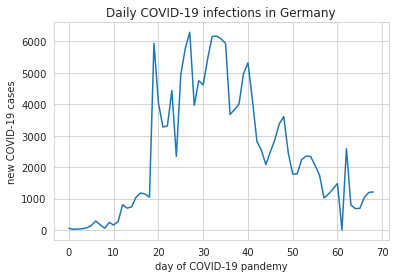

In [6]:
# The following command alone is sufficient to create the plot
plt.plot(day, cases)

# The following commands label the axes and the plot
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('new COVID-19 cases')
plt.title('Daily COVID-19 infections in Germany')

## Your tasks

**Note:** Please continue this notebook and do all the following tasks within that notebook. Please comment appropriately all code-blocks and perform the necessary discussions of your results in Markup cells. All plots must have appropriate axes-labels and a title! Your project submission will consist of the modified notebook.

The plot that we just created tells us that *new* infections have a decreasing trend. But to understand better the current state of the pandemy, we want to look at additional quantities.

1. Plot the *total accumulated number* of COVID-19 cases against the day. Give a short discussion on that plot. What kind of curve do you expect for a pandemy that can spread freely?  What effect do the current measures and restrictions in Germany (e.g. social distancing) have on the curve? Discuss this with the knowledge that drastic limitations on our life (closure of schools etc.) took effect in Germany on the 16th of March. What will the curve look like when the pandemy is over?
   
   **Hint:** Have a look at the `numpy` `cumsum`-function.
   
2. A very important quantity to decide whether current measures to confine the pandemy can be relaxed is the *development of the number of people who still can infect others (the infectious population)*. The main purpose of all COVID-19 restrictions is to realise a decreasing trend of that number! This quantity can be obtained by *the number of infected people minus those who died and minus those who recovered from COVID-19*. It is implicitely assumed in the following that recovered patients are immune against COVID-19.

   From the required information *only* the number of dead people is certain. The number of infected people is uncertain because we only have *reported* cases and we do not know how many people are infected but were not (yet) tested. Even more uncertain is the number of recovered patients and we entirely rely on an estimate for it. Furthermore, there are *many* definitions of *recoverd patients* around. The one coming closest to our procedure is the following: *A patient recovers if there are no symptoms 14-days after she was tested positively or after she left hospital.*
   
   Lacking further information, we define (overestimate) the number of recovered persons as follows: We consider everybody recovered who was positively tested more than 13-days ago and did not die.    
   Given these assumptions, create a plot of the infectious population as a function of pandemy-day for Germany. Discuss that plot. Assuming, the government withdrew all CVID-19 restrictions today and people immediately behaved as before the crisis, how long would it take until the number of infectious patients reaches again its all-time maximum?
   
   **Hint:** `numpy` array-slicing!
   
3. Create a loop over all countries with confirmed COVID-19 cases - see the hint below. List those countries who currently still have a *raising* infectious population. Limit the analysis to countries with more than 5000 confirmed COVID-19 cases.

   **Hint:** A raising infectious population means (for us) that the *derivative* of the plot from task (2) is positive today. 
   
**Note:** I include sample plots for tasks 1 and 2 from the 28th of March to the materials of this project. This allows you to verify your solution.   

Text(0.5, 1.0, 'COVID-19 infections in Germany')

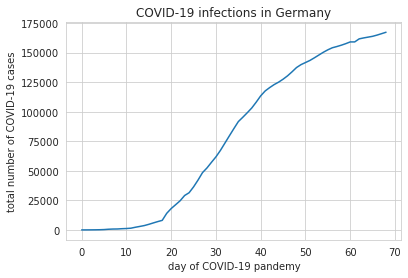

In [7]:
# problem 1

#calculate cummulated sum
cum_cases=cases.cumsum()

#plot cummulated sums against days
plt.plot(day, cum_cases)

# The following commands label the axes and the plot
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('total number of COVID-19 cases')
plt.title('COVID-19 infections in Germany')

#the plot first increased exponentially but then slowed down 
#freely propagated pandemic whould have exponential growth in total number of infections
#since the loockdown the infections should increase slowlier than exponential, until it reaches the saturation and approximates a flat horizontal line when the pandemic is over.

39


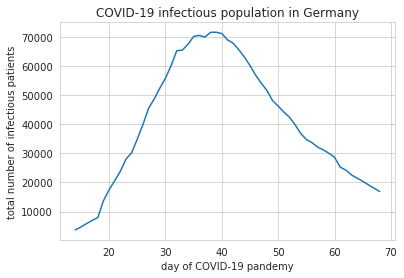

In [47]:
#problem 2

#total deaths
cum_deaths=deaths.cumsum()

#total recovered patients starting from day 14
cum_recovered=cum_cases[:-14]-cum_deaths[14:]

#total infectious starting from day 14
cum_infectious=cum_cases[14:]-cum_recovered-cum_deaths[14:]

#only starting from day 14
day_cut=day[14:]

plt.plot(day_cut, cum_infectious)

# The following commands label the axes and the plot
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('total number of infectious patients')
plt.title('COVID-19 infectious population in Germany')

#calculate the day the maximum was reached
max_day=day_cut[cum_infectious.argmax()]
print(max_day)

#on day 20 there is almost the exact same number of infectious people as that of today, and it took 39-20=19 days to reach maximum. therefore we approximate that it will take less than 19 days to reach that maximum again, since from day 20 to day 39 there was already the lockdown. 


In [48]:
# Hint to create a loop over all countries.
#
# The countries of known COVID-19 cases are stored in a so-called list.
# A Python-list is, as the numpy-arrays, a container (in that case of strings)
# whose elements can be accessed and iterated over in a very similar way:

#define a function which gives the difference of the infectious number between the last day and the second last day 
def infectious_der(country):
    #total cases
    cum_ca=corona[country][1].cumsum()
    #total deaths
    cum_de=corona[country][2].cumsum()
    #total recovered
    cum_re=cum_ca[:-14]-cum_de[14:]
    #total infectious
    cum_in=cum_ca[14:]-cum_de[14:]-cum_re
    #difference of the infectious number between the last day and the second last day
    return cum_in[-1]-cum_in[-2]
    
for country in countries:
    #select cases>5000
    if corona[country][1].cumsum()[-1]>5000:
        #select increasing infectious number
        if infectious_der(country)>0:
            print(country)
            

Algeria
Argentina
Australia
Bangladesh
Belarus
Brazil
Chile
Colombia
Czechia
Dominican_Republic
Ecuador
Egypt
India
Iran
Kuwait
Mexico
Pakistan
Peru
Philippines
Portugal
Qatar
Romania
Russia
Saudi_Arabia
South_Africa
South_Korea
Ukraine
United_Kingdom
United_States_of_America
